In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

file = open("/home/andres/repos/rat-mapping-paper/reports/J_RCML_000/combine.pkl","rb")
combinations = pickle.load(file)

In [44]:
def threshold_array(pos):
    my_dict = {
    (key[0], key[2]): value["a"].mean() for  key,value in comb.items() if key[1] == pos
    }
    keys, values = zip(*my_dict.items())
    axis0 = np.unique([key[0] for key in keys])
    axis1 = ["Deltoid", "Biceps", "Triceps", "ECR", "FCR", "ADM"][::-1]
    array = np.zeros((len(axis0), len(axis1)))
    for key, value in zip(keys, values):
        array[np.where(axis0 == key[0])[0], np.where(np.array(axis1) == key[1][1:])[0]] = 1 / value   
    return(array, axis0, axis1)

In [120]:
def graph_arr(pos):
    arr, subject, muscle = threshold_array(pos)
    sub_mean = np.mean(arr, axis=0)
    row = np.vsplit(arr,len(subject))
    row = [i.tolist() for i in row]
    for xval in row:
        plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=20, alpha =0.3)
        plt.plot(sub_mean,muscle, color = "black", linestyle='dashed', marker=".", markersize=20)
    plt.yticks(weight ='bold',style = 'italic')
    plt.xlabel('Efficacy')
    plt.show()

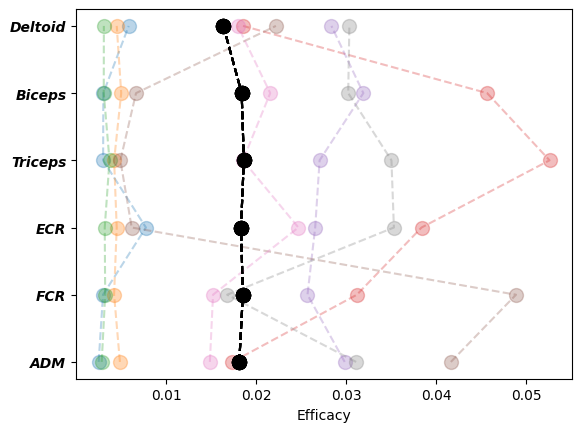

In [121]:
graph_arr("C7M-C7L")